# Data Analysis and Visualization
Open data from Ordnungsamt

Author: Karina Condeixa

------------
### Content
1. Data Visualization 
2. Data Analysis

### Questions to understand the data

What is the message pct per district? 

Which district has the most resolved complaints?

Which district has the less resolved complaints?

- Most of the complaints were from Neukölln, 80% of the solved complaints and 18%  of the solved ones. The numbers of occurrences in other districts are insignificant. 

What month has more occurrences?

- September 2022 had a peak of occurences in the Done status.

What years have more posts?

- They have more information on 2023 (92% of the total) and few occurrences in 2022.

--------------

#### What the graphs show?

**Frequency of values**

A bargraph of occurrences per district and status shows the ercentage in progress and done by district.

Neukölln was the predominant districts for this type of disturbance with 80% of the total occurrences done and 18.4% of the total occurrences in progress.

**Timeseries: line graphs of Number of Month wise occurrences in the different status were plot.**

A line graph shows occurrences for in progress and for done by dates.

A massive peak of occurrences was shown in March, which can indicate a seasonality. However, many occurrences for after the day of the analysis were shown. So, graphs for 2022 and 2023 by month were plot in different graphs.

A line graph occurrences per month shows peaks until March, but show occurrences in the rest of this year. It is an inconsistence of the dataset. 

Filtering the data by today, it was found that there are 153 occurrences in the 'erstellungsDatum'(creation data) column after the day of today. There are errors in data for this column.


**Occurrences done and in progress for 2022 were plot in a line graph.**

In progress occurrences where between 2 and 3 per month in the first trimester, got stable until August with an occurrence per month. 

Done ocurrences where between 1 and 2,  3 at most until August, it had a peak in September and decline to 5 in October.

There are not occurrences in November and December.

It's hard to say if it an inconsistence of the dataset or if it really happend.

**Stacked bar graph of Ocurrences per year and status**

This graph made more clear how higher was the number of occcurrences in 2023 over 2022.


In [2]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
# %matplotlib 
from datetime import datetime


In [3]:
# set maximum number of rows

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)

In [4]:
# import the data
df_original = pd.read_csv('data/data_ordnungsamt.csv')
df_original.shape

(5408, 7)

In [5]:
df_original.head(10)

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Spiegel),18.01.2017 - 15:01:09,In Bearbeitung,Spiegel
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Holz-/Regalteile),18.01.2017 - 15:05:54,In Bearbeitung,Holz-/Regalteile
2,622944,['vf943l'],Lichtenberg,Park- und Haltverbot nicht berücksichtigt,11.04.2017 - 14:31:38,In Bearbeitung,Pkw in geschützter Grünanlage aufgefahren
3,681533,['pkyi2p'],Lichtenberg,Parken auf Gehweg,25.06.2017 - 13:09:47,In Bearbeitung,NaN
4,788708,['9axrlt'],Lichtenberg,Abfall - Müllablagerung,27.10.2017 - 12:30:24,In Bearbeitung,Bauschutt
5,883168,['uaxhc1'],Reinickendorf,Gehweg/Radweg zugeparkt,23.02.2018 - 16:50:57,In Bearbeitung,NaN
6,885548,['fn5am9'],Lichtenberg,Park- und Haltverbot nicht berücksichtigt,27.02.2018 - 21:12:00,In Bearbeitung,Kfz steht in der kurve. Mit plane abgedeckt.
7,890996,['56ups1'],Reinickendorf,"Parkraumbewirtschaftung - Anwohner-, Gästevign...",06.03.2018 - 22:12:36,In Bearbeitung,ca. 13.22 Uhr\n\nkeine Vignette keine Parksche...
8,950160,['ysxgxt'],Reinickendorf,Straßenaufsicht - Defekte Ampel,08.05.2018 - 16:30:29,In Bearbeitung,Rotlicht an Ampel K5 komplett erloschen. Ampel...
9,1018325,['vgibr5'],Spandau,Parkraumbewirtschaftung - Sonstiges,12.07.2018 - 21:45:50,In Bearbeitung,Seit vier Tagen parkt in falscher Fahrtrichtun...


In [6]:
df_original.columns

Index(['id', 'meldungsNummern', 'bezirk', 'betreff', 'erstellungsDatum',
       'status', 'sachverhalt'],
      dtype='object')

In [7]:
# check the statistics 
# df_original.describe()

In [8]:
print(df_original.isnull().sum())

id                   0
meldungsNummern      0
bezirk               0
betreff              0
erstellungsDatum     0
status               0
sachverhalt         20
dtype: int64


In [9]:
df_original.sachverhalt.describe()

count              5388
unique             4443
top       Einkaufswagen
freq                 54
Name: sachverhalt, dtype: object

In [10]:
df = df_original.copy()
df.head()

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Spiegel),18.01.2017 - 15:01:09,In Bearbeitung,Spiegel
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Holz-/Regalteile),18.01.2017 - 15:05:54,In Bearbeitung,Holz-/Regalteile
2,622944,['vf943l'],Lichtenberg,Park- und Haltverbot nicht berücksichtigt,11.04.2017 - 14:31:38,In Bearbeitung,Pkw in geschützter Grünanlage aufgefahren
3,681533,['pkyi2p'],Lichtenberg,Parken auf Gehweg,25.06.2017 - 13:09:47,In Bearbeitung,NaN
4,788708,['9axrlt'],Lichtenberg,Abfall - Müllablagerung,27.10.2017 - 12:30:24,In Bearbeitung,Bauschutt


In [11]:
from datetime import date
# date_2023_begin = date(2023, 1, 1)
today = date.today()
today = pd.to_datetime(today)

df['erstellungsDatum'] =  pd.to_datetime(df['erstellungsDatum'])
occcurrences_after_today = df[df['erstellungsDatum']>= today]
len(occcurrences_after_today)


1107

### Data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5408 entries, 0 to 5407
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                5408 non-null   int64         
 1   meldungsNummern   5408 non-null   object        
 2   bezirk            5408 non-null   object        
 3   betreff           5408 non-null   object        
 4   erstellungsDatum  5408 non-null   datetime64[ns]
 5   status            5408 non-null   object        
 6   sachverhalt       5388 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 295.9+ KB


### Transform id column in string

In [13]:
df['id'] = df['id'].map(str)
# df.info()

In [14]:
# df['erstellungsDatum'] = pd.to_datetime(df['erstellungsDatum']) 
# df['erstellungsDatum']

### Removing other disturbances

In [15]:
df.betreff.unique()

array(['Sperrmüll abgelagert (Spiegel)',
       'Sperrmüll abgelagert (Holz-/Regalteile)',
       'Park- und Haltverbot nicht berücksichtigt', 'Parken auf Gehweg',
       'Abfall - Müllablagerung', 'Gehweg/Radweg zugeparkt',
       'Parkraumbewirtschaftung - Anwohner-, Gästevignetten',
       'Straßenaufsicht - Defekte Ampel',
       'Parkraumbewirtschaftung - Sonstiges', 'Grünanlage/Park - Grillen',
       'Abfall - Sperrmüll', 'Abfall - Bauabfälle, Bauschutt',
       'Grünanlage/Park - Campieren, Zelten', 'Lärm - Gaststätte',
       'Sondernutzung - Schankvorgärten (Tische und Stühle) KORI AND FAY',
       'Abfall - Sonstiges',
       'Parkraumbewirtschaftung - Ausnahme, Betriebsvignetten',
       'Straßenaufsicht - Wildwuchs von Privatgelände', 'Campieren',
       'Obdachlosenunterkunft',
       'Straßenverkehrsrechtliche Anordnungen - Verkehrszeichen',
       'Ladenöffnung - Sonn- und Feiertage',
       'Sondernutzung - Abfallcontainer', 'Straßenaufsicht - Sonstiges',
       'Baust

In [16]:
### Clean subject column keeping only "Sperrmüll abgelagert"

# drops the columns that has not Sperrmüll abgelagert in the subject column   
df_narrow = df[(df.betreff.str.startswith('Sperrmüll abgelagert'))]
df_narrow.head()

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Spiegel),2017-01-18 15:01:09,In Bearbeitung,Spiegel
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Holz-/Regalteile),2017-01-18 15:05:54,In Bearbeitung,Holz-/Regalteile
59,1804983,['b6pfcx'],Neukölln,Sperrmüll abgelagert,2020-06-05 10:50:02,In Bearbeitung,Sperrmüll
69,1952905,['2a1t6p'],Neukölln,Sperrmüll abgelagert,2020-08-20 09:06:18,In Bearbeitung,Sperrmüll
82,2059167,['rw035t'],Neukölln,Sperrmüll abgelagert,2020-04-11 08:02:10,In Bearbeitung,"Sehr geehrtes Team,\n\nauf der Gradestraße, zw..."


In [17]:
df_narrow = df_narrow.replace('Sperrmüll abgelagert (Spiegel)', 'Sperrmüll abgelagert')
df_narrow = df_narrow.replace('Sperrmüll abgelagert (Holz-/Regalteile)', 'Sperrmüll abgelagert')
df_narrow.betreff.unique()

array(['Sperrmüll abgelagert'], dtype=object)

### Missing Values

In [18]:
# Get counts of Nan values - df['sachverhalt'].isna().sum()
print("Missing values in sachverhalt column: " + str(df['sachverhalt'].isna().sum()))

Missing values in sachverhalt column: 20


In [19]:
# % pf missing values
pct_missing = (20/5408) * 100
pct_missing

0.3698224852071006

In [20]:
print("Missing values in sachverhalt column: " + str(df_narrow['sachverhalt'].isna().sum()))

Missing values in sachverhalt column: 4


In [21]:
df_narrow.shape

(614, 7)

In [22]:
# % pf missing values
pct_missing = (4/614) * 100
pct_missing

0.6514657980456027

Since we the dataset has only 4 nulls (0,651%) in the 'Sachveralt'columns, the rows with null values with be droped. 

In [23]:
# drop rows with nulls
df_narrow = df_narrow.dropna()

In [24]:
# check nulls
df_narrow.isnull().sum()

id                  0
meldungsNummern     0
bezirk              0
betreff             0
erstellungsDatum    0
status              0
sachverhalt         0
dtype: int64

In [25]:
df_narrow.shape

(610, 7)

### Remove extra spaces

In [26]:
df_narrow.sachverhalt.str.strip()

0                                                 Spiegel
1                                        Holz-/Regalteile
59                                              Sperrmüll
69                                              Sperrmüll
82      Sehr geehrtes Team,\n\nauf der Gradestraße, zw...
                              ...                        
5388                                        1 Tischplatte
5389                                     Kinderwagen etc.
5393                                        1 Holzpalette
5398                                            Holzmöbel
5401                                      Alte Regalreste
Name: sachverhalt, Length: 610, dtype: object

In [27]:
df_narrow.head()

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,2017-01-18 15:01:09,In Bearbeitung,Spiegel
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,2017-01-18 15:05:54,In Bearbeitung,Holz-/Regalteile
59,1804983,['b6pfcx'],Neukölln,Sperrmüll abgelagert,2020-06-05 10:50:02,In Bearbeitung,Sperrmüll
69,1952905,['2a1t6p'],Neukölln,Sperrmüll abgelagert,2020-08-20 09:06:18,In Bearbeitung,Sperrmüll
82,2059167,['rw035t'],Neukölln,Sperrmüll abgelagert,2020-04-11 08:02:10,In Bearbeitung,"Sehr geehrtes Team,\n\nauf der Gradestraße, zw..."


### Creating a weekday column

In [28]:
df_narrow['erstellungsDatum'] = pd.to_datetime(df_narrow['erstellungsDatum'])
df_narrow['day_of_week'] = df_narrow['erstellungsDatum'].dt.day_name()
df_narrow.head()

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt,day_of_week
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,2017-01-18 15:01:09,In Bearbeitung,Spiegel,Wednesday
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,2017-01-18 15:05:54,In Bearbeitung,Holz-/Regalteile,Wednesday
59,1804983,['b6pfcx'],Neukölln,Sperrmüll abgelagert,2020-06-05 10:50:02,In Bearbeitung,Sperrmüll,Friday
69,1952905,['2a1t6p'],Neukölln,Sperrmüll abgelagert,2020-08-20 09:06:18,In Bearbeitung,Sperrmüll,Thursday
82,2059167,['rw035t'],Neukölln,Sperrmüll abgelagert,2020-04-11 08:02:10,In Bearbeitung,"Sehr geehrtes Team,\n\nauf der Gradestraße, zw...",Saturday


### Creating columns date and time

In [29]:
df_narrow['time'] = pd.to_datetime(df_narrow['erstellungsDatum']).dt.time

df_narrow['date'] = pd.to_datetime(df_narrow['erstellungsDatum']).dt.date

In [30]:
#Add a month column
df_narrow['month'] = df_narrow['date'].apply(lambda x: x.strftime('%b'))

In [31]:
df_narrow.head()

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt,day_of_week,time,date,month
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,2017-01-18 15:01:09,In Bearbeitung,Spiegel,Wednesday,15:01:09,2017-01-18,Jan
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,2017-01-18 15:05:54,In Bearbeitung,Holz-/Regalteile,Wednesday,15:05:54,2017-01-18,Jan
59,1804983,['b6pfcx'],Neukölln,Sperrmüll abgelagert,2020-06-05 10:50:02,In Bearbeitung,Sperrmüll,Friday,10:50:02,2020-06-05,Jun
69,1952905,['2a1t6p'],Neukölln,Sperrmüll abgelagert,2020-08-20 09:06:18,In Bearbeitung,Sperrmüll,Thursday,09:06:18,2020-08-20,Aug
82,2059167,['rw035t'],Neukölln,Sperrmüll abgelagert,2020-04-11 08:02:10,In Bearbeitung,"Sehr geehrtes Team,\n\nauf der Gradestraße, zw...",Saturday,08:02:10,2020-04-11,Apr


In [32]:
df_narrow.betreff.unique()

array(['Sperrmüll abgelagert'], dtype=object)

### Frequency of values

In [33]:
columns_list = ['id', 'meldungsNummern', 'bezirk', 'betreff', 'erstellungsDatum','status', 'sachverhalt']

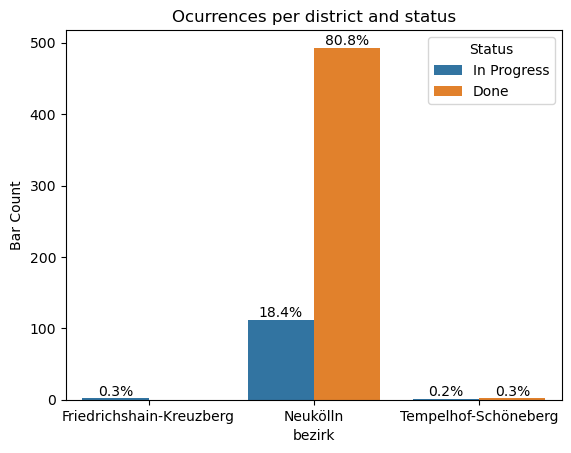

In [34]:
# plot
fig, ax = plt.subplots()
ax = sns.countplot(x="bezirk", hue="status", data=df_narrow)
ax.set(ylabel='Bar Count', title='Ocurrences per district and status')
ax.legend(title='Status', loc='upper right', labels=['In Progress', 'Done'])

# add annotations
for c in ax.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/df_narrow.status.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

In [35]:
# df_plot = df.groupby(['status', 'bezirk']).size().reset_index().pivot(columns='status', index='bezirk', values=0)
# df_plot.plot(kind='barh', stacked=True)

# # ax.set(ylabel='Districts', xlabel='', title='Ocurrences per district and status')
# # ax.legend(title='Status', loc='upper right', labels=['In Progress', 'Done'])

# plt.show()

In [36]:

# df_plot = df_narrow.groupby(['status', 'bezirk']).size().reset_index().pivot(columns='status', index='bezirk', values=0)
# df_plot.plot(kind='barh', stacked=True)

# # ax.set(ylabel='Districts', xlabel='', title='Ocurrences per district and status')
# # ax.legend(title='Status', loc='upper right', labels=['In Progress', 'Done'])

# plt.show()

### Timeseries

In [37]:
in_progress = df_narrow[df_narrow['status'] == 'In Bearbeitung']
done = df_narrow[df_narrow['status'] == 'Erledigt']

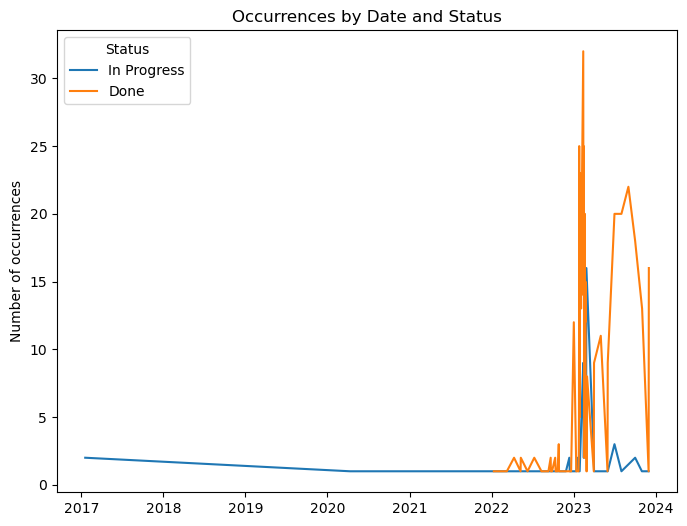

In [38]:
# prepare and plot

in_progress_df = pd.DataFrame(in_progress.groupby(['date'])['bezirk'].count()).reset_index()
in_progress_df['date'] = pd.to_datetime(in_progress_df['date'])
in_progress_date = in_progress_df['date']
in_progress_value = in_progress_df['bezirk']
in_progress_df


done_df = pd.DataFrame(done.groupby(['date'])['bezirk'].count()).reset_index()
done_df['date'] = pd.to_datetime(done_df['date'])
done_date = done_df['date']
done_value = done_df['bezirk']

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(in_progress_date, in_progress_value)
ax.plot(done_date, done_value)

ax.set_title('Occurrences by Date and Status')
ax.set_ylabel('Number of occurrences')
ax.legend(title='Status', loc='upper left', labels=['In Progress', 'Done'])

### Only 2023

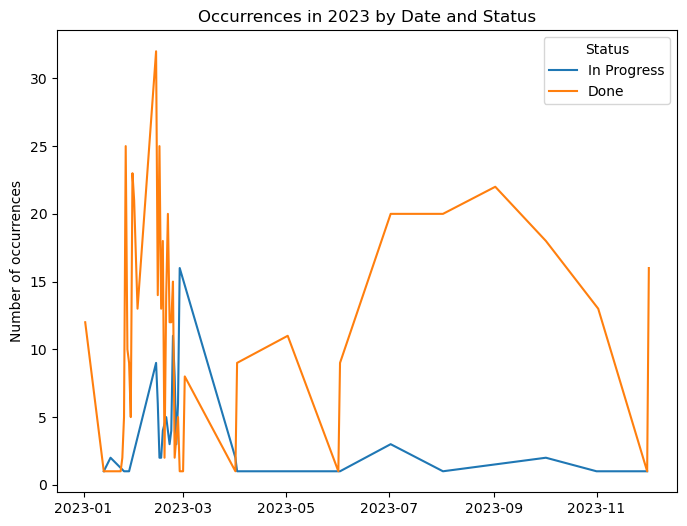

In [39]:

from datetime import date
date_2023_begin = date(2023, 1, 1)


in_progress_2023 =  in_progress[in_progress['date']>= date_2023_begin]
# in_progress_2023

done_2023 = done[done['date'] >= date_2023_begin]
# done_2023


# count occurrences per day
count_inprogress_date = in_progress_2023.groupby(['status', 'date']).size().reset_index().pivot(columns='status', index='date', values=0)
count_done_date = done_2023.groupby(['status', 'date']).size().reset_index().pivot(columns='status', index='date', values=0)



in_progress_2023_df = pd.DataFrame(in_progress_2023.groupby(['date'])['bezirk'].count()).reset_index()
in_progress_2023_df['date'] = pd.to_datetime(in_progress_2023_df['date'])
in_progress_date_2023 = in_progress_2023_df['date']
in_progress_value_2023 = in_progress_2023_df['bezirk']
in_progress_df


done_2023_df = pd.DataFrame(done_2023.groupby(['date'])['bezirk'].count()).reset_index()
done_2023_df['date'] = pd.to_datetime(done_2023_df['date'])
done_date_2023 = done_2023_df['date']
done_value_2023 = done_2023_df['bezirk']

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(in_progress_date_2023, in_progress_value_2023)
ax.plot(done_date_2023, done_value_2023)

ax.set_title('Occurrences in 2023 by Date and Status')
ax.set_ylabel('Number of occurrences')
ax.legend(title='Status', loc='best', labels=['In Progress', 'Done'])

In [40]:
## checking occcurrences after today
today = date.today()
today = pd.to_datetime(today)
print('Today is ', today)
print('Ocurrences after today: ',len(df_narrow[df_narrow['erstellungsDatum']>today]))

Today is  2023-03-19 00:00:00
Ocurrences after today:  153


There are 153 occurrences in the 'erstellungsDatum'(creation data) column after the day of today.
There are errors in data for this column.

In [41]:
df_narrow.shape

(610, 11)

### Seasonality

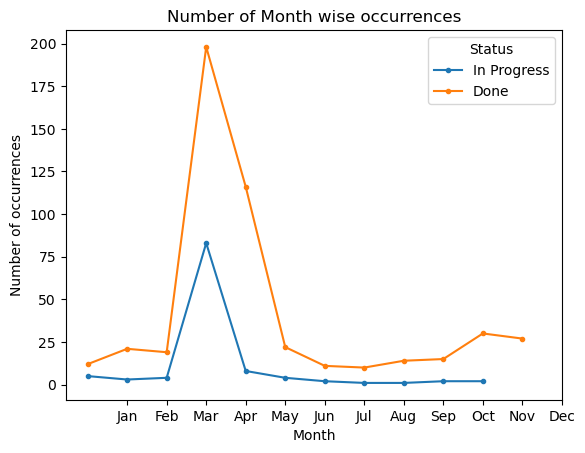

In [42]:
fig, ax = plt.subplots()

in_progress.groupby(['month'])['bezirk'].count().plot(marker = '.')
done.groupby(['month'])['bezirk'].count().plot(marker = '.')
ax.set_xlabel('Month')
ax.set_ylabel('Number of occurrences')
ax.set_title('Number of Month wise occurrences')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.legend(title='Status', loc='upper right', labels=['In Progress', 'Done'])
plt.show()

### Only 2023

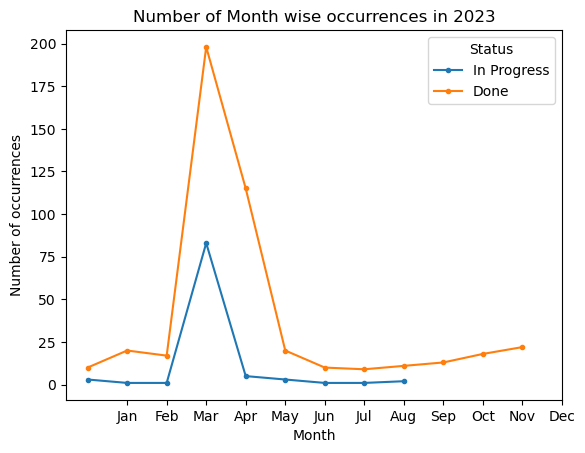

In [43]:
fig, ax = plt.subplots()

in_progress_2023.groupby(['month'])['bezirk'].count().plot(marker = '.')
done_2023.groupby(['month'])['bezirk'].count().plot(marker = '.')
ax.set_xlabel('Month')
ax.set_ylabel('Number of occurrences')
ax.set_title('Number of Month wise occurrences in 2023')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.legend(title='Status', loc='upper right', labels=['In Progress', 'Done'])
plt.show()

### Only 2022

In [44]:
in_progress_2022 =  in_progress[in_progress['date']< date_2023_begin]
# in_progress_2022

done_2022 = done[done['date'] < date_2023_begin]
# done_2022

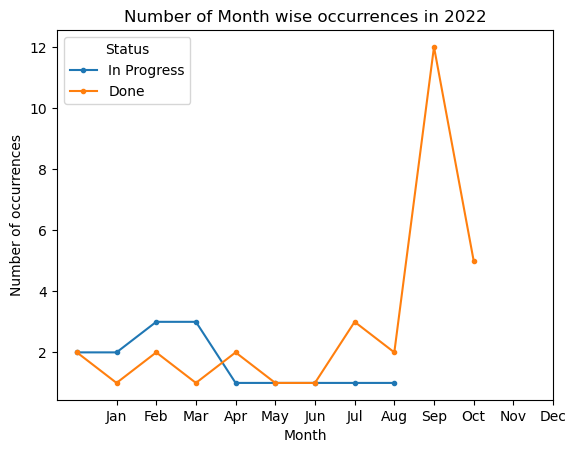

In [45]:
fig, ax = plt.subplots()

in_progress_2022.groupby(['month'])['bezirk'].count().plot(marker = '.')
done_2022.groupby(['month'])['bezirk'].count().plot(marker = '.')
ax.set_xlabel('Month')
ax.set_ylabel('Number of occurrences')
ax.set_title('Number of Month wise occurrences in 2022')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.legend(title='Status', loc='upper left', labels=['In Progress', 'Done'])
plt.show()

### 2022 vs 2023

In [46]:
len(df)

5408

In [47]:
len(in_progress_2022)+ len(done_2022)+len(in_progress_2023)+ len(done_2023)

610

In [48]:
len(in_progress_2022)

15

In [49]:
len(done_2022)

32

In [50]:
len(in_progress_2023)

100

In [51]:
len(done_2023)

463

In [52]:
len_total_2022 = len(in_progress_2022)+ len(done_2022)

In [53]:
len_total_2023 = len(in_progress_2023)+ len(done_2023)

In [54]:
pct_2023 = len_total_2023/(len_total_2023 + len_total_2022)

In [55]:
df_narrow['year'] = pd.DatetimeIndex(df_narrow['erstellungsDatum']).year
df_narrow.head()

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt,day_of_week,time,date,month,year
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,2017-01-18 15:01:09,In Bearbeitung,Spiegel,Wednesday,15:01:09,2017-01-18,Jan,2017
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,2017-01-18 15:05:54,In Bearbeitung,Holz-/Regalteile,Wednesday,15:05:54,2017-01-18,Jan,2017
59,1804983,['b6pfcx'],Neukölln,Sperrmüll abgelagert,2020-06-05 10:50:02,In Bearbeitung,Sperrmüll,Friday,10:50:02,2020-06-05,Jun,2020
69,1952905,['2a1t6p'],Neukölln,Sperrmüll abgelagert,2020-08-20 09:06:18,In Bearbeitung,Sperrmüll,Thursday,09:06:18,2020-08-20,Aug,2020
82,2059167,['rw035t'],Neukölln,Sperrmüll abgelagert,2020-04-11 08:02:10,In Bearbeitung,"Sehr geehrtes Team,\n\nauf der Gradestraße, zw...",Saturday,08:02:10,2020-04-11,Apr,2020


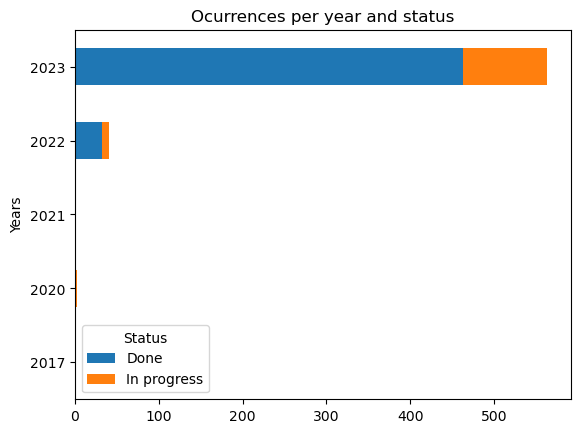

In [56]:
df_plot = df_narrow.groupby(['status', 'year']).size().reset_index().pivot(columns='status', index='year', values=0)
ax = df_plot.plot(kind='barh', stacked=True)

plt.title("Ocurrences per year and status")
plt.ylabel("Years")
plt.legend(title='Status', labels = ['Done', 'In progress'],loc='best')

plt.show()

In [61]:
# Checking if the done accurrences have more than 1 meldungsNummern and if these numbers are repeated in different collumns


# df_plot = df_narrow.groupby(['meldungsNummern', 'status']).size().reset_index().pivot(columns='meldungsNummern', index='status', values=0)
# df_plot

# df_narrow.groupby(by=['meldungsNummern', 'status'])\
#     .sum()\
#     .fillna(0)\
#     .style.format('{:.2f}').background_gradient(axis=0)



In [62]:
# len(df[df['meldungsNummern'].str.contains('3i0d8h')])
# df[df['meldungsNummern'].str.contains('3i0d8h')]

df[df['meldungsNummern'].str.contains('cyx9mp')]

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt
3525,4291206,"['at76dd', 'bk7wn5', 'cyx9mp', 'k3zw8x', 'psl9...",Neukölln,Sperrmüll abgelagert,2023-12-02 10:42:36,Erledigt,Bretter


The numbers are uniques, it is not clear what they mean.

References
- [Time series with Matplotlib](https://www.python-graph-gallery.com/basic-time-series-with-matplotlib)